In [115]:
import pandas as pd
import os

file_path = '/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Pandora247s1_ColumbiaMD_20240904_L0_part0 3.txt'

base_name = os.path.basename(file_path)
csv_file_name = os.path.splitext(base_name)[0] + '.csv'

# Read the entire file
with open(file_path, 'r', encoding='latin1') as file:
    lines = file.readlines()

# Skip the initial 44 rows
#data_lines = lines[44:]
data_lines = lines

# Process each line to split into rows and columns
data_list = []
for line in data_lines:
    # Strip the newline character and split by tabs
    rows = line.strip().split('\t')
    for row in rows:
        # Split each row by spaces
        columns = row.split()
        data_list.append(columns)

# Convert the list of lists into a DataFrame
data3 = pd.DataFrame(data_list)
# Convert the necessary columns to numeric before saving
data3.iloc[:, 2:] = data3.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# # Define the column names
# column_names = [
#     'routine', 'time (yyyymmddThhmmssZ)', 'Routine count', 'Repetition count', 'measurement duration (s)',
#     'Integration time [ms]', 'Number of cycles', 'Saturation index', 'filterwheel 1', 'filterwheel 2',
#     'Pointing zenith angle (degree)', 'Zenith pointing mode', 'Pointing azimuth (degree)', 'Azimuth pointing mode',
#     'Data processing type', 'Target distance [m]', 'Temperature at electronics board (C)',
#     'Spectrometer control temperature (C)', 'Auxiliary spectrometer temperature (C)', 'Temperature in head sensor (C)',
#     'Humidity in head sensor (%)', 'Pressure in head sensor (hPa)', 'Scale factor for data', 'Uncertainty indicator'
# ] + [f'Mean pixel {i}' for i in range(1, 513)]

# # Assign column names to the DataFrame
# data1.columns = column_names

# save_folder = "/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/"

# # # Save the DataFrame to a CSV file with the same name as the initial text file
# data1.to_csv(os.path.join(save_folder, csv_file_name), index=False)

# print(f"Data saved to {os.path.join(save_folder, csv_file_name)}")

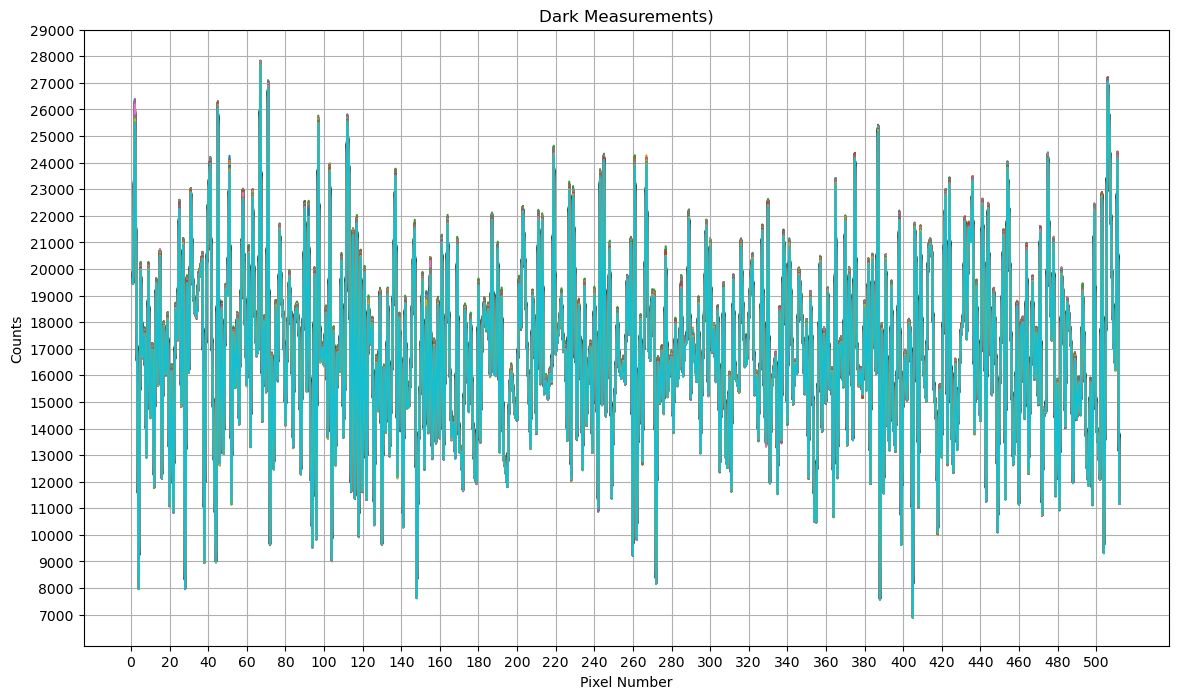

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 600
scale_factors = data2.iloc[0:N, 22]  # Scale factor for data
measurements_s = data2.iloc[0:N, 24:536]  # 512 pixels

scale_factors = scale_factors.apply(pd.to_numeric, errors='coerce') 
measurements_s = measurements_s.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN
#Divide all the values by the scale factor in column 24
measurements = measurements_s.div(scale_factors, axis=0)

# Ensure all data is numeric and handle any potential NaNs
measurements = measurements.apply(pd.to_numeric, errors='coerce')
measurements = measurements.fillna(0)  # Replace NaNs with 0 or use measurements.dropna() to remove them

pixels = np.arange(1, len(measurements.columns) + 1)

# 1. Visualize the Data
plt.figure(figsize=(14, 8))
for i in range(len(measurements)):
    plt.plot(pixels, measurements.iloc[i]) #, label=f'Reading {i+1}'
plt.xticks(np.arange(0, 512, 20))
plt.yticks(np.arange(7000, 30000, 1000)) 
plt.xlabel('Pixel Number')
#plt.xlim([0,100])
#plt.ylim([975,1025])
plt.grid()
plt.ylabel('Counts')
plt.title('Dark Measurements)')
#plt.legend()
plt.show()

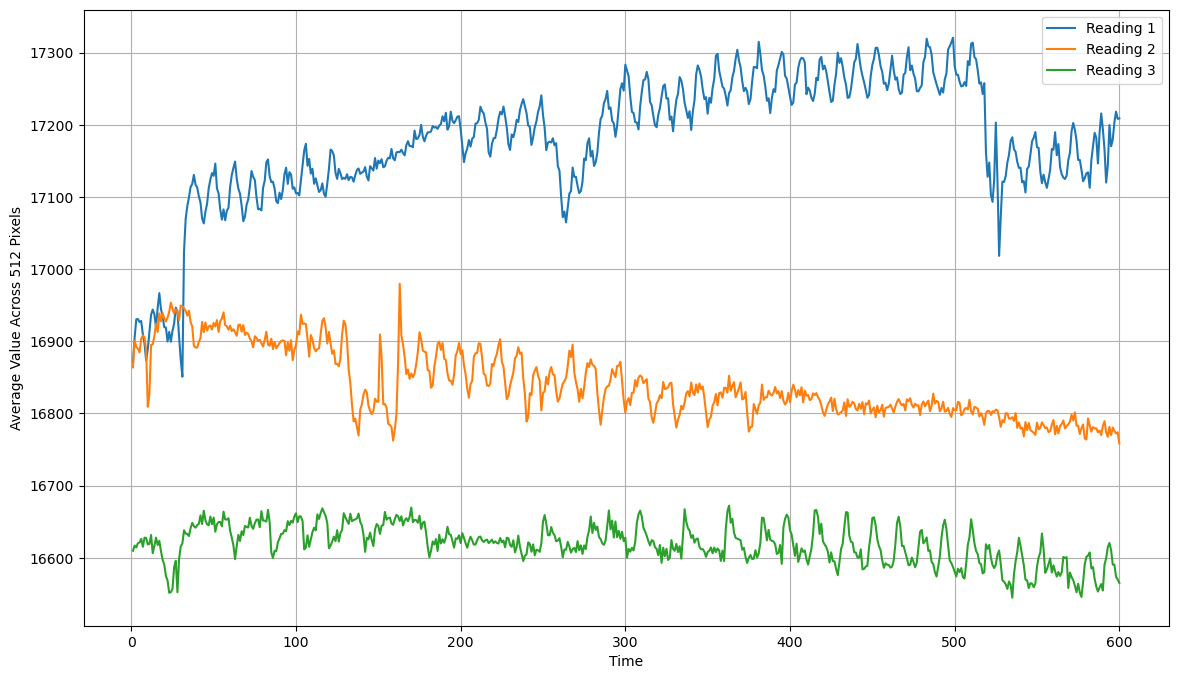

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

measurements_s = data1.iloc[0:600, 24:536]
measurements_s2 = data2.iloc[0:600, 24:536]
measurements_s3 = data3.iloc[0:600, 24:536]

# Convert to numeric to ensure all data can be processed correctly
measurements_s = measurements_s.apply(pd.to_numeric, errors='coerce')
measurements_s2 = measurements_s2.apply(pd.to_numeric, errors='coerce')
measurements_s3 = measurements_s3.apply(pd.to_numeric, errors='coerce')

# Compute the mean of the 512 columns for each row (axis=1 means row-wise operation)
averaged_values = measurements_s.mean(axis=1)
averaged_values2 = measurements_s2.mean(axis=1)
averaged_values3 = measurements_s3.mean(axis=1)

# Plot the averaged values for each row
plt.figure(figsize=(14, 8))
plt.plot(np.arange(1, len(averaged_values) + 1), averaged_values, label = 'Reading 1')
plt.plot(np.arange(1, len(averaged_values2) + 1), averaged_values2, label = 'Reading 2')
plt.plot(np.arange(1, len(averaged_values3) + 1), averaged_values3, label = 'Reading 3')
plt.xlabel('Time')
plt.ylabel('Average Value Across 512 Pixels')
plt.title('')
plt.legend()
plt.grid()
plt.show()

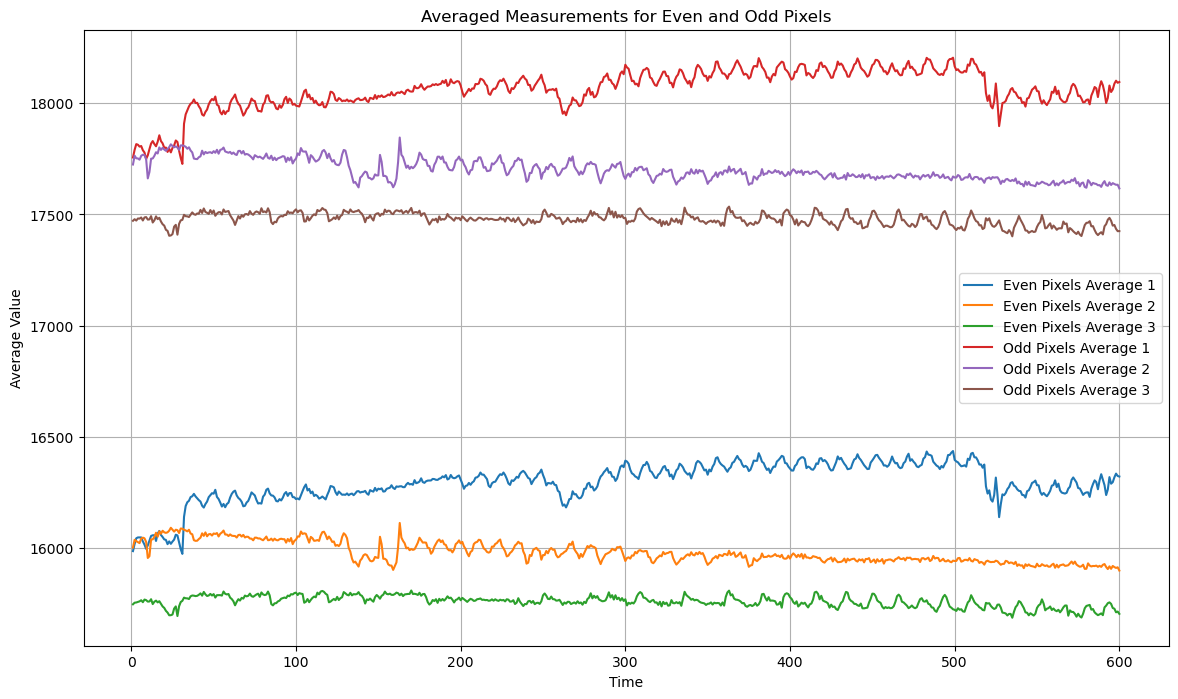

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming measurements_s is the DataFrame
measurements_s = data1.iloc[0:600, 24:536]
measurements_s2 = data2.iloc[0:600, 24:536]
measurements_s3 = data3.iloc[0:600, 24:536]

# Convert to numeric to ensure all data can be processed correctly
measurements_s = measurements_s.apply(pd.to_numeric, errors='coerce')
measurements_s2 = measurements_s2.apply(pd.to_numeric, errors='coerce')
measurements_s3 = measurements_s3.apply(pd.to_numeric, errors='coerce')

# Create an array of pixel numbers (1 to 512)
pixels = np.arange(1, len(measurements_s.columns) + 1)

# Separate even and odd pixels
even_pixels = pixels[pixels % 2 == 0]  # Get even pixel numbers
odd_pixels = pixels[pixels % 2 != 0]   # Get odd pixel numbers

# Separate measurements for even and odd pixels
even_measurements = measurements_s.iloc[:, even_pixels - 1]  # Subtract 1 for 0-based indexing
odd_measurements = measurements_s.iloc[:, odd_pixels - 1]    # Subtract 1 for 0-based indexing

even_measurements2 = measurements_s2.iloc[:, even_pixels - 1]  # Subtract 1 for 0-based indexing
odd_measurements2 = measurements_s2.iloc[:, odd_pixels - 1]    # Subtract 1 for 0-based indexing

even_measurements3 = measurements_s3.iloc[:, even_pixels - 1]  # Subtract 1 for 0-based indexing
odd_measurements3 = measurements_s3.iloc[:, odd_pixels - 1]    # Subtract 1 for 0-based indexing

# Compute the row-wise mean for even and odd pixel measurements
even_averages = even_measurements.mean(axis=1)
odd_averages = odd_measurements.mean(axis=1)

even_averages2 = even_measurements2.mean(axis=1)
odd_averages2 = odd_measurements2.mean(axis=1)

even_averages3 = even_measurements3.mean(axis=1)
odd_averages3 = odd_measurements3.mean(axis=1)

# Plot the averaged values for even pixels
plt.figure(figsize=(14, 8))
plt.plot(np.arange(1, len(even_averages) + 1), even_averages, label='Even Pixels Average 1')
plt.plot(np.arange(1, len(even_averages) + 1), even_averages2, label='Even Pixels Average 2')
plt.plot(np.arange(1, len(even_averages) + 1), even_averages3, label='Even Pixels Average 3')

plt.plot(np.arange(1, len(odd_averages) + 1), odd_averages, label='Odd Pixels Average 1')
plt.plot(np.arange(1, len(odd_averages) + 1), odd_averages2, label='Odd Pixels Average 2')
plt.plot(np.arange(1, len(odd_averages) + 1), odd_averages3, label='Odd Pixels Average 3')
plt.xlabel('Time')
plt.ylabel('Average Value')
plt.title('Averaged Measurements for Even and Odd Pixels')
plt.grid()
plt.legend()
plt.show()

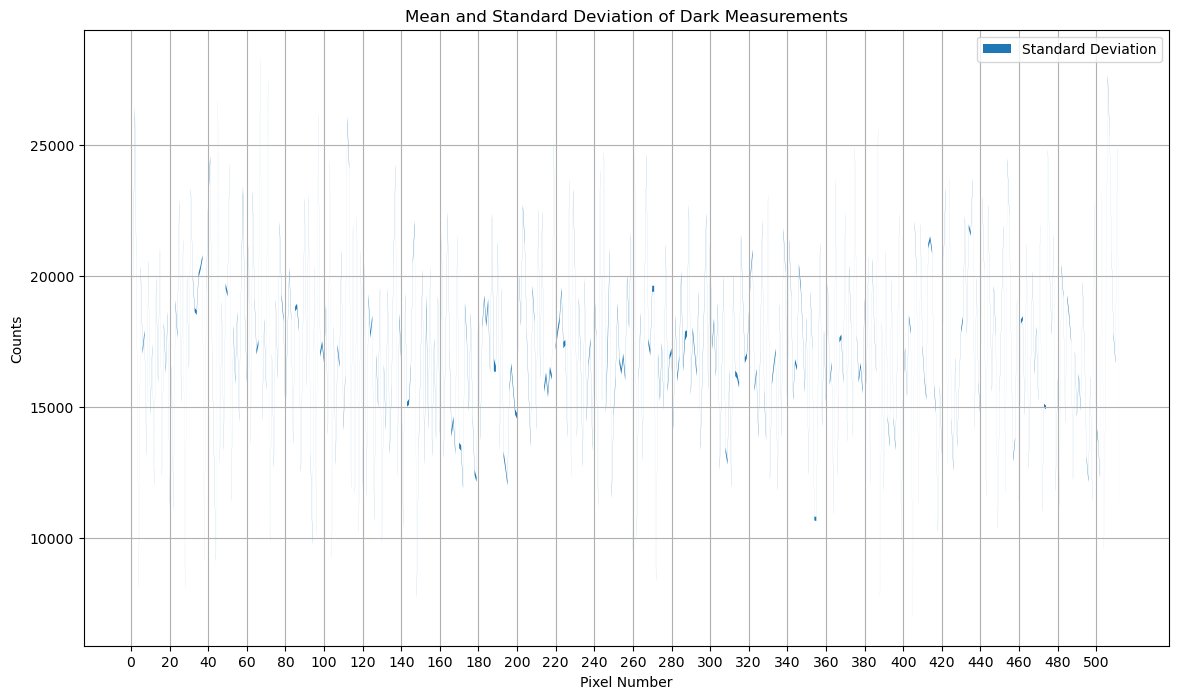

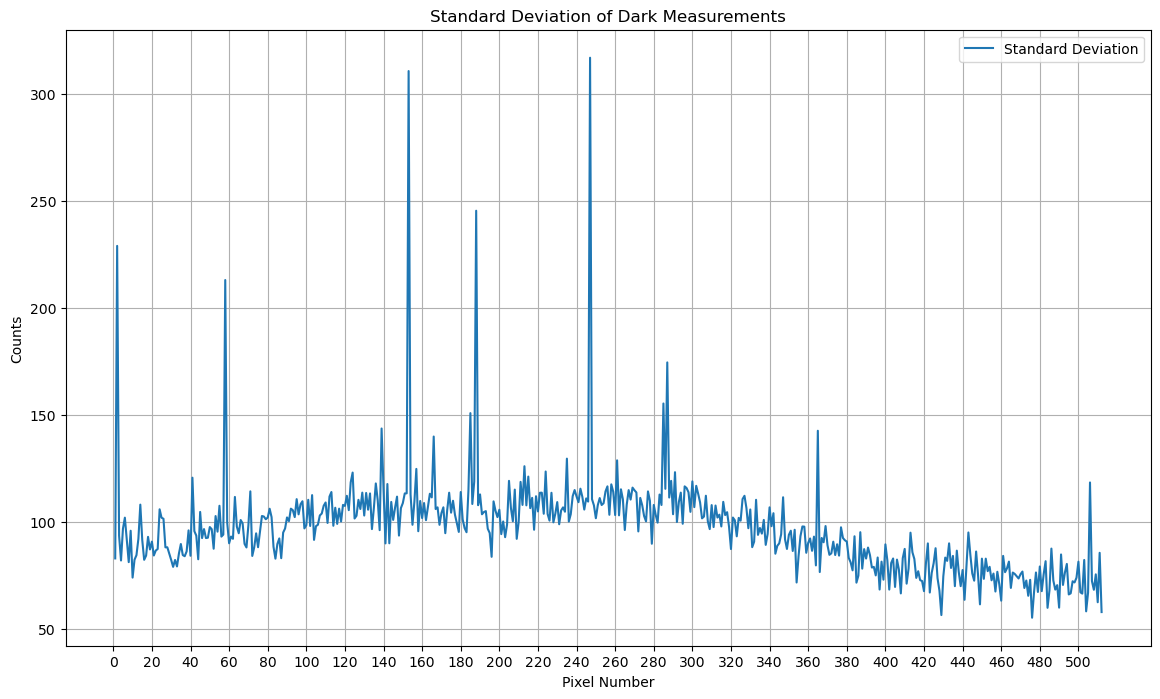

In [67]:
# 2. Calculate Statistical Metrics
mean_values = measurements.mean(axis=0)
std_values = measurements.std(axis=0)

plt.figure(figsize=(14, 8))
#plt.plot(measurements.columns, mean_values, label='Mean Value')
plt.fill_between(pixels, mean_values - std_values, mean_values + std_values, alpha=1, label='Standard Deviation')
plt.xticks(np.arange(0, 512, 20))
plt.xlabel('Pixel Number')
plt.ylabel('Counts')
#plt.xlim(0,100)
plt.title('Mean and Standard Deviation of Dark Measurements')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(pixels, std_values, label='Standard Deviation')
plt.xticks(np.arange(0, 512, 20))
plt.xlabel('Pixel Number')
plt.ylabel('Counts')
#plt.xlim(0,100)
plt.title('Standard Deviation of Dark Measurements')
plt.legend()
plt.grid()
plt.show()

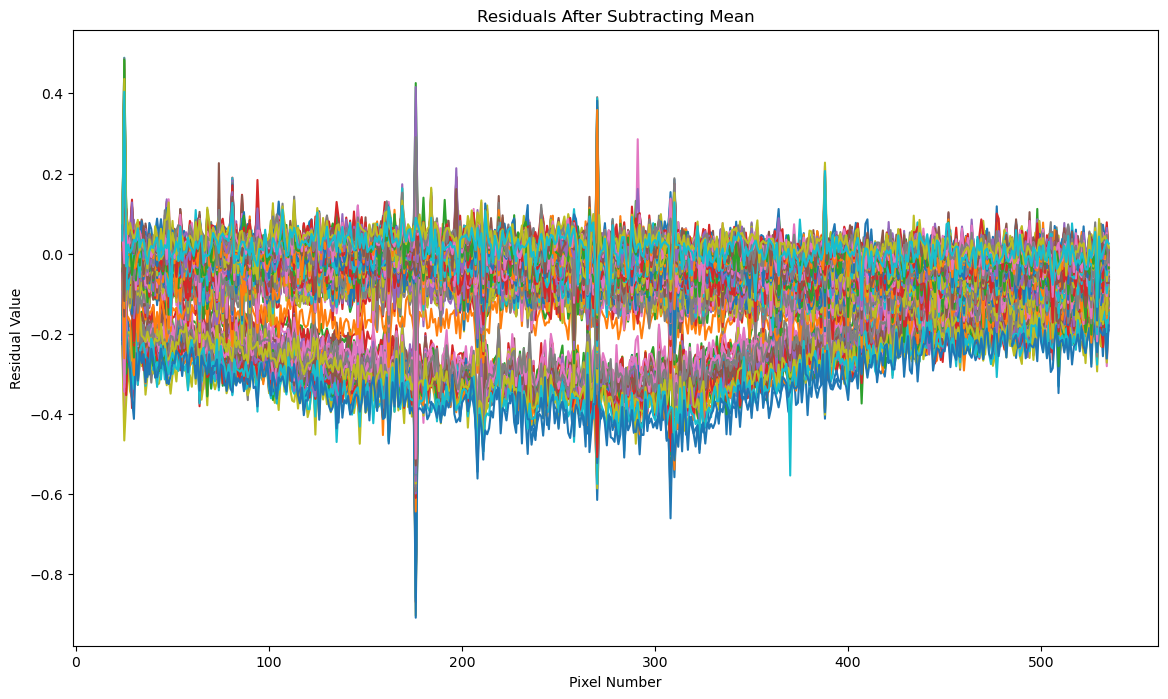

In [79]:
mean_values = measurements.mean(axis=0)
residuals = measurements - mean_values

plt.figure(figsize=(14, 8))
for i in range(200):
    plt.plot(residuals.columns, residuals.iloc[i]/1000) #, label=f'Reading {i+1}'
plt.xticks([0, 100, 200, 300, 400, 500], [0, 100, 200, 300, 400, 500])
plt.xlabel('Pixel Number')
plt.ylabel('Residual Value')
plt.title('Residuals After Subtracting Mean')
#plt.legend()
plt.show()

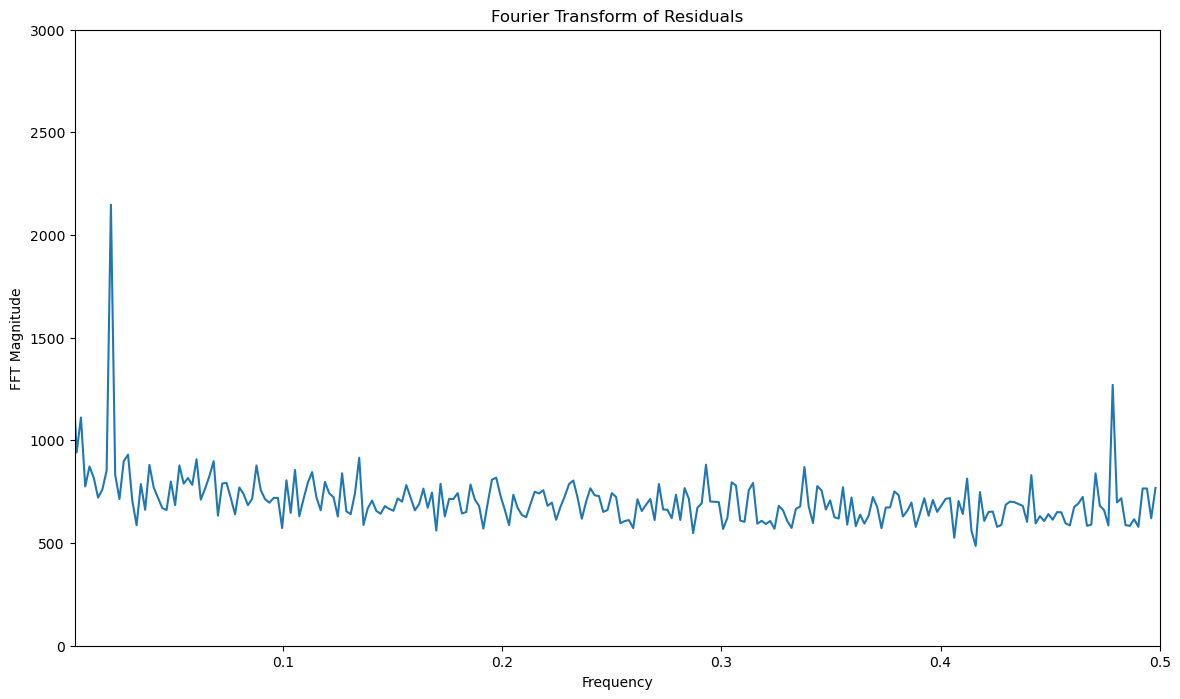

Dominant frequencies greater than 0 Hz:
Frequency: 0.0078125 Hz, Magnitude: 1111.563232810162
Frequency: 0.021484375 Hz, Magnitude: 2147.712552270444
Frequency: 0.478515625 Hz, Magnitude: 1270.2901096227513


In [57]:
# 3. Fourier Analysis
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import find_peaks

fft_values = fft(residuals.T, axis=0)
fft_magnitude = np.abs(fft_values)
frequencies = fftfreq(len(measurements.columns))

# Average the FFT magnitudes across all readings to get a general idea of the dominant frequency
average_fft_magnitude = np.mean(fft_magnitude, axis=1)

# Consider only the positive half of the spectrum (since the FFT output is symmetric)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_magnitude = average_fft_magnitude[:len(frequencies)//2]

plt.figure(figsize=(14, 8))
plt.plot(positive_frequencies, positive_magnitude)
plt.xlim(0.005, 0.5)
plt.ylim(0, 3000)
plt.xlabel('Frequency')
plt.ylabel('FFT Magnitude')
plt.title('Fourier Transform of Residuals')
plt.show()

# Find all peaks (dominant frequencies) in the FFT magnitude spectrum greater than 0 Hz
peaks, _ = find_peaks(positive_magnitude, height=1000)  # Peaks above 0 magnitude
dominant_frequencies = positive_frequencies[peaks]
dominant_magnitudes = positive_magnitude[peaks]

# Print all dominant frequencies and their magnitudes
print("Dominant frequencies greater than 0 Hz:")
for freq, mag in zip(dominant_frequencies, dominant_magnitudes):
    print(f"Frequency: {freq} Hz, Magnitude: {mag}")

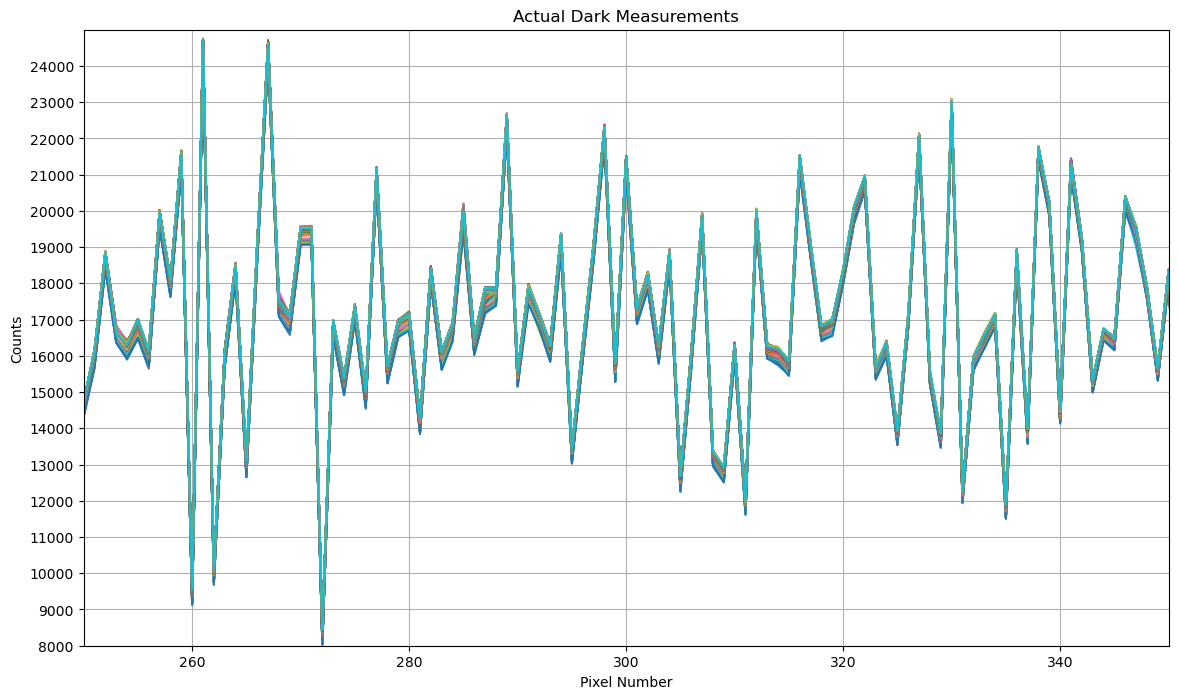

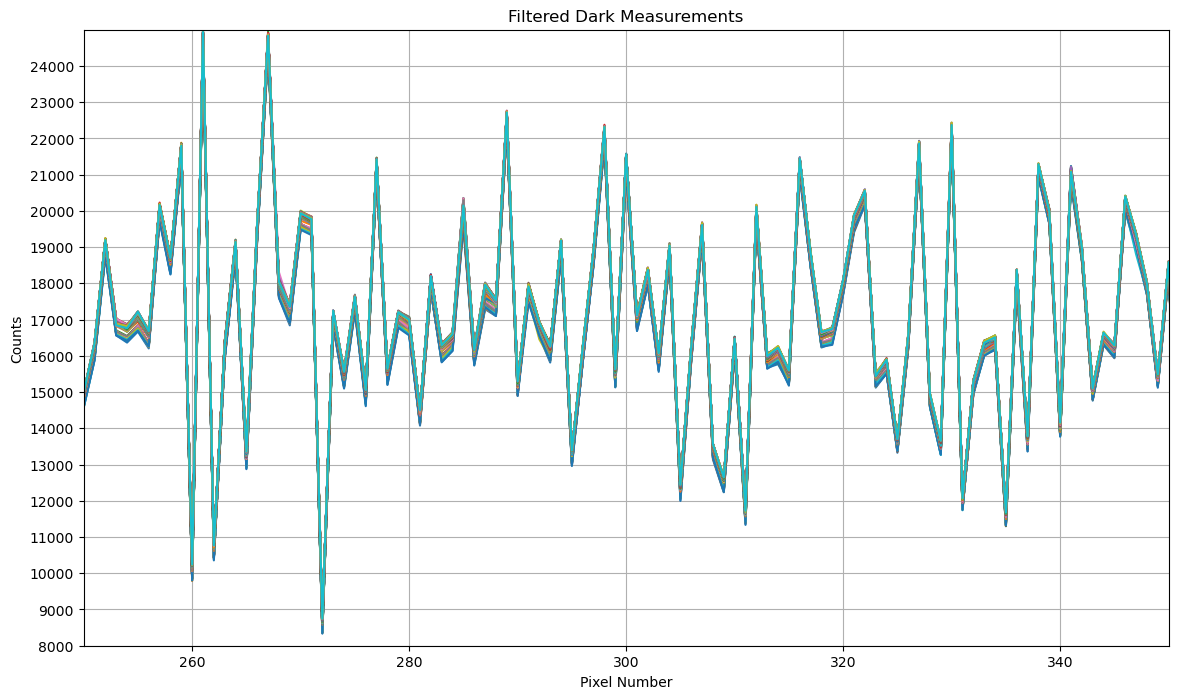

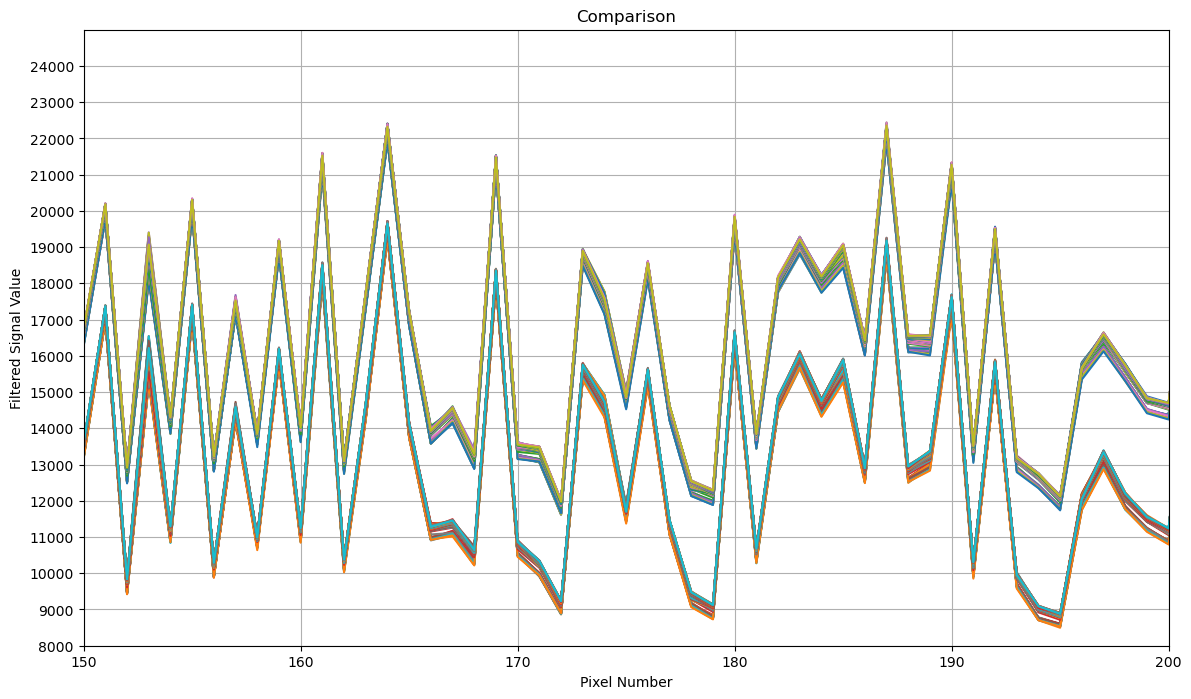

In [63]:
plt.figure(figsize=(14, 8))
for i in range(N):
   plt.plot(pixels,measurements.iloc[i], label=f'Actual {i+1}')
#plt.xticks([0, 100, 200, 300, 400, 500], [0, 100, 200, 300, 400, 500])
plt.xlabel('Pixel Number')
plt.xlim([250,350])
plt.ylim([8000,25000])
plt.yticks(np.arange(8000, 25000, 1000)) 
plt.grid(which='major', axis='both')
plt.ylabel('Counts')
plt.title('Actual Dark Measurements')
#plt.legend()
plt.show()

# Perform Fourier Transform on each reading
fft_values = fft(measurements.T, axis=0)  # Transpose to get FFT along pixels
frequencies = fftfreq(len(measurements.columns))

# Create a copy of the FFT values to filter out noise
filtered_fft_values = np.copy(fft_values)

# Define the frequencies you want to remove
noise_frequencies = [0.0078125, 0.021484375, 0.478515625] 
#0.04296875

# Filter out the noise frequencies by setting them to zero
for noise_freq in noise_frequencies:
    # Find the indices corresponding to the noise frequencies
    indices_to_filter = np.where((frequencies == noise_freq) | (frequencies == -noise_freq))
    filtered_fft_values[indices_to_filter, :] = 0

# Perform the inverse Fourier Transform to reconstruct the filtered signal
filtered_signal = ifft(filtered_fft_values, axis=0).real

# 1. Visualize the Data

plt.figure(figsize=(14, 8))
for i in range(N):
   plt.plot(pixels,filtered_signal[:, i], label=f'Filtered {i+1}') #, label=f'Reading {i+1}'
#plt.xticks([0, 100, 200, 300, 400, 500], [0, 100, 200, 300, 400, 500])
plt.xlabel('Pixel Number')
plt.xlim([250,350])
plt.ylim([8000,25000])
plt.yticks(np.arange(8000, 25000, 1000)) 
plt.grid(which='major', axis='both')
plt.ylabel('Counts')
plt.title('Filtered Dark Measurements')
#plt.legend()
plt.show()

# Plot the original and filtered signals for comparison
plt.figure(figsize=(14, 8))
for i in range(N):
    plt.plot(pixels,measurements.iloc[i], label=f'Actual {i+1}')
    plt.plot(pixels,filtered_signal[:, i]-3000, label=f'Filtered {i+1}') #, label=f'Reading {i+1}'
plt.xlabel('Pixel Number')
plt.xlim([150,200])
plt.ylim([8000,25000])
plt.yticks(np.arange(8000, 25000, 1000)) 
plt.grid(which='major', axis='both')
plt.ylabel('Filtered Signal Value')
plt.title('Comparison')
#plt.legend()
plt.show()

Pixels with High Standard Deviation
Pixel: 2, SD: 209.8264799871947
Pixel: 153, SD: 284.57003489744125
Pixel: 247, SD: 256.14054697116705


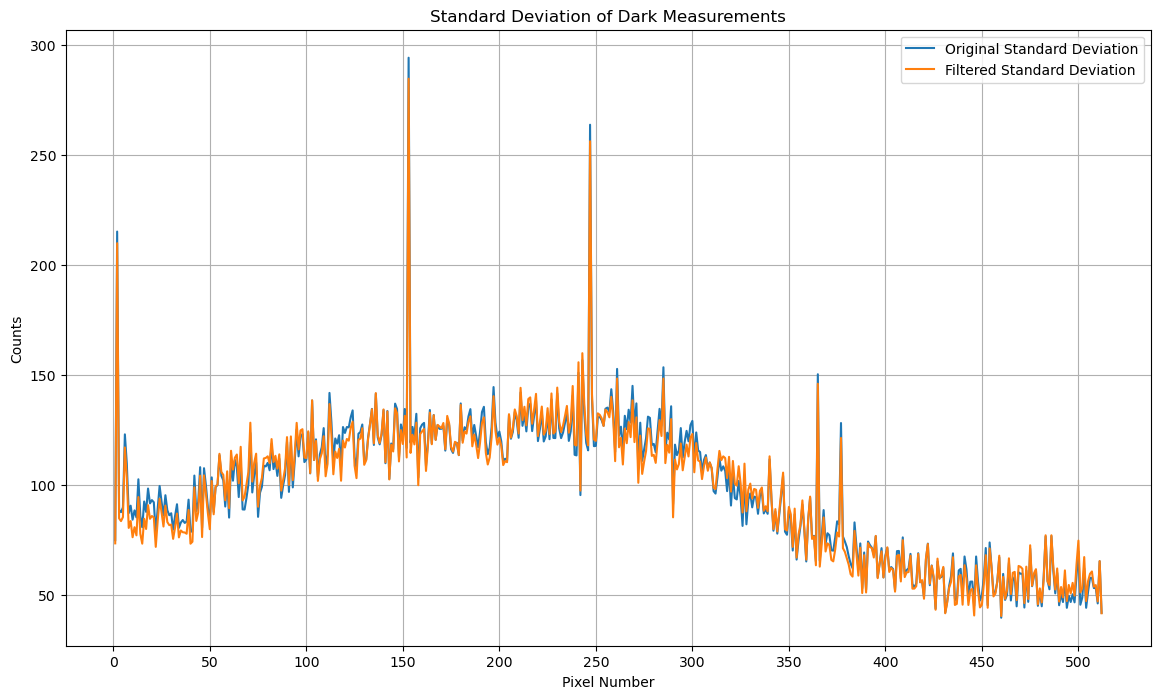

In [49]:
# 2. Calculate Statistical Metrics
std_values = measurements.std(axis=0)
std_values_filtered = filtered_signal.std(axis=1)

# Find all peaks (dominant frequencies) in the FFT magnitude spectrum greater than 0 Hz
pixels = np.arange(1, len(measurements.columns) + 1)
peaks, _ = find_peaks(std_values_filtered, height=160)  # Peaks above 0 magnitude
sd_pix = pixels[peaks]
sd_mag = std_values_filtered[peaks]

print("Pixels with High Standard Deviation")
for p, m in zip(sd_pix, sd_mag):
    print(f"Pixel: {p}, SD: {m}")

plt.figure(figsize=(14, 8))
plt.plot(pixels, std_values, label='Original Standard Deviation')
plt.plot(pixels, std_values_filtered, label='Filtered Standard Deviation')
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500], [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
plt.xlabel('Pixel Number')
plt.ylabel('Counts')
#plt.xlim(0,100)
plt.grid(which='major', axis='both')
plt.title('Standard Deviation of Dark Measurements')
plt.legend()
plt.show()



(600, 256)


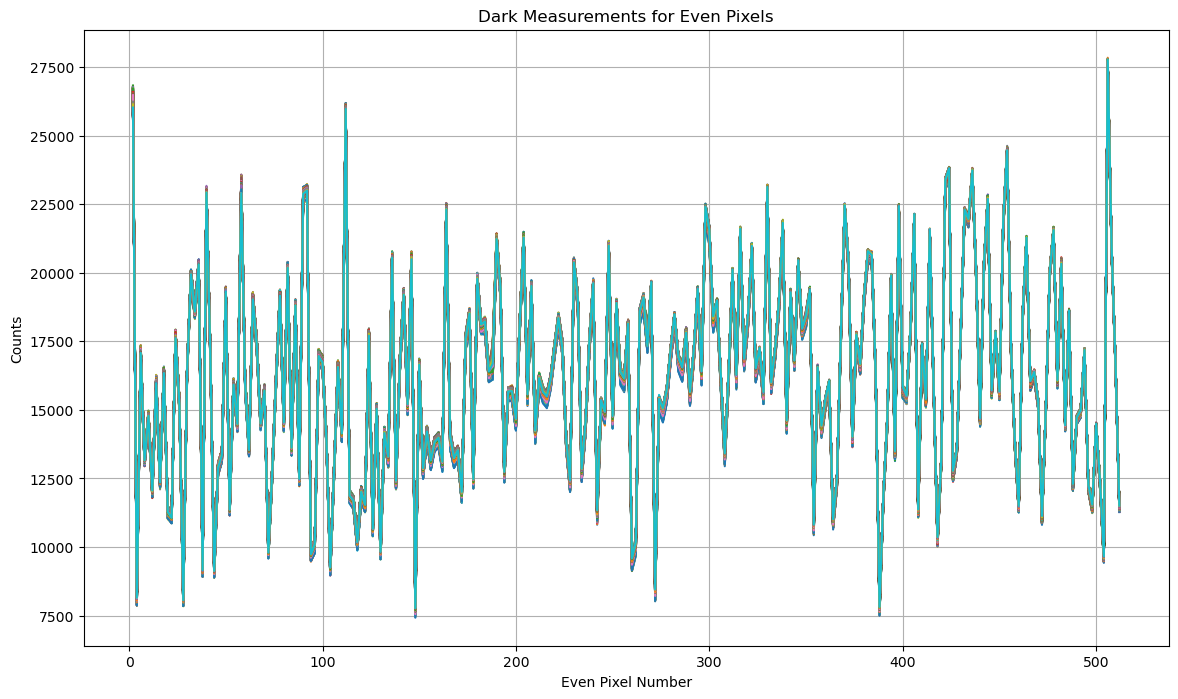

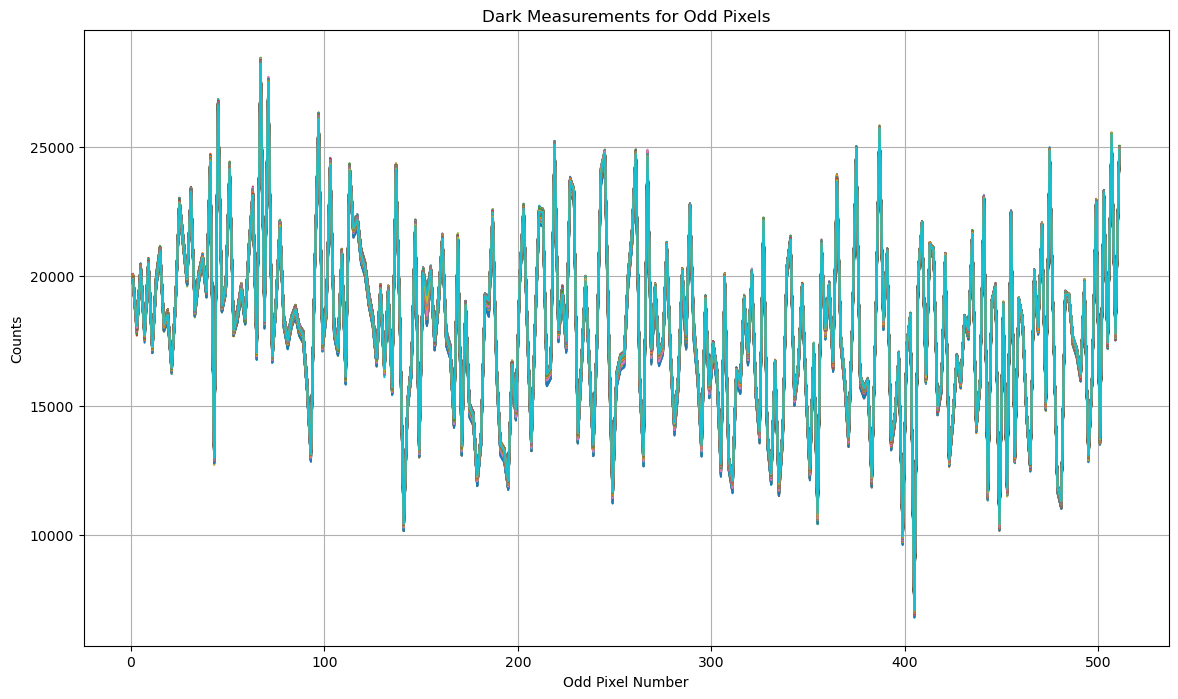

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Separate even and odd pixels
even_pixels = pixels[pixels % 2 == 0]  # Get even pixel numbers
odd_pixels = pixels[pixels % 2 != 0]   # Get odd pixel numbers

# Separate measurements for even and odd pixels
even_measurements = measurements.iloc[:, even_pixels - 1]  # Subtract 1 to match 0-based indexing
odd_measurements = measurements.iloc[:, odd_pixels - 1]    # Subtract 1 to match 0-based indexing

# 1. Visualize the Even Pixels Data
plt.figure(figsize=(14, 8))
for i in range(len(even_measurements)):
    plt.plot(even_pixels, even_measurements.iloc[i])
#plt.xticks(np.arange(0, 512, 20))
plt.xlabel('Even Pixel Number')
plt.ylabel('Counts')
plt.title('Dark Measurements for Even Pixels')
plt.grid()
plt.show()

# 2. Visualize the Odd Pixels Data
plt.figure(figsize=(14, 8))
for i in range(len(odd_measurements)):
    plt.plot(odd_pixels, odd_measurements.iloc[i])
#plt.xticks(np.arange(0, 512, 20))
plt.xlabel('Odd Pixel Number')
plt.ylabel('Counts')
plt.title('Dark Measurements for Odd Pixels')
plt.grid()
plt.show()

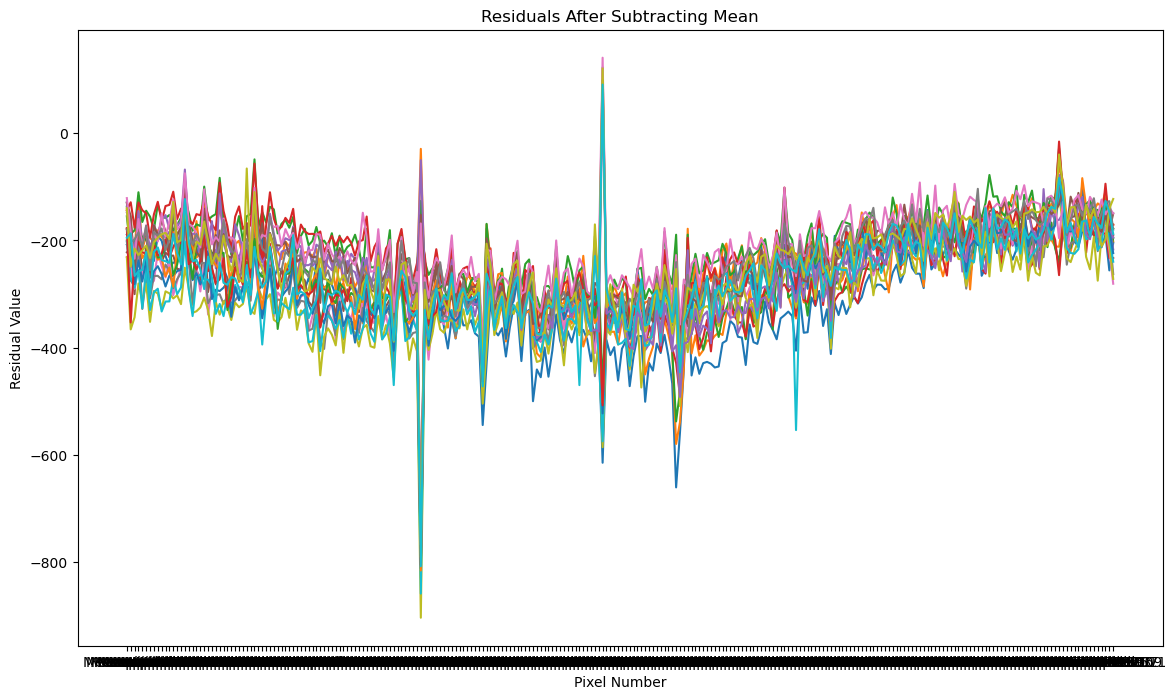

In [359]:
mean_values = odd_measurements.mean(axis=0)
residuals = odd_measurements - mean_values

plt.figure(figsize=(14, 8))
for i in range(20):
    plt.plot(residuals.columns, residuals.iloc[i]) #, label=f'Reading {i+1}'
#plt.xticks([0, 100, 200, 300, 400, 500], [0, 100, 200, 300, 400, 500])
plt.xlabel('Pixel Number')
plt.ylabel('Residual Value')
plt.title('Residuals After Subtracting Mean')
#plt.legend()
plt.show()

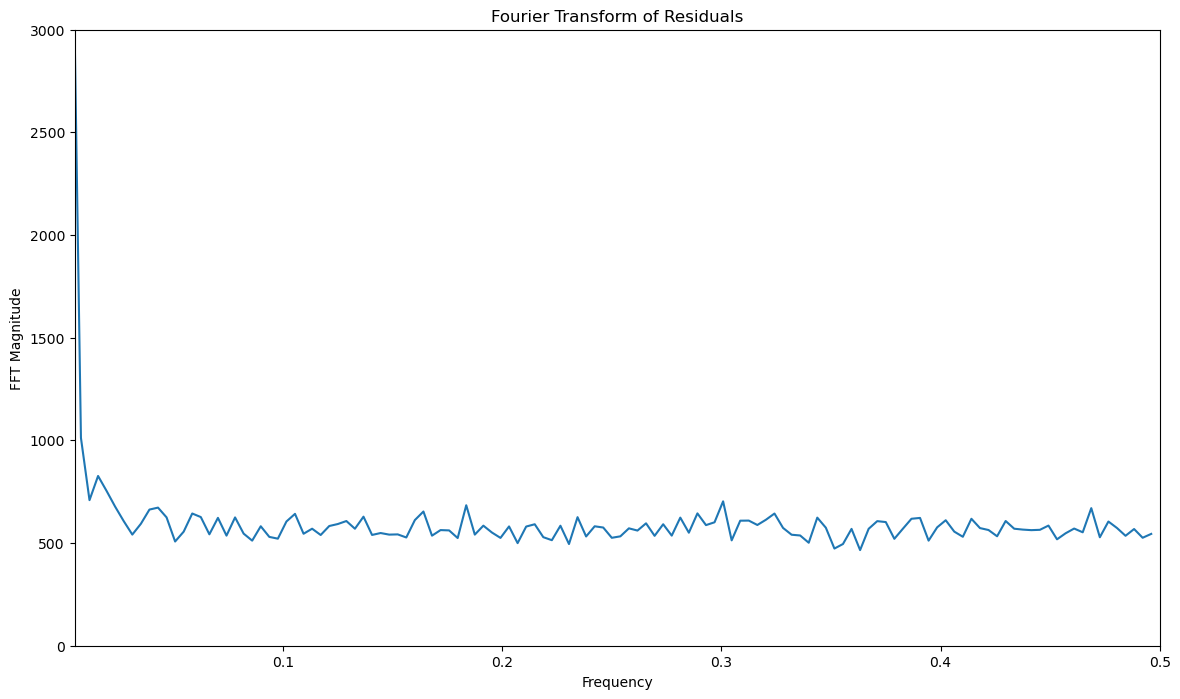

Dominant frequencies greater than 0 Hz:


In [363]:
# 3. Fourier Analysis
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import find_peaks

fft_values = fft(residuals.T, axis=0)
fft_magnitude = np.abs(fft_values)
frequencies = fftfreq(len(odd_measurements.columns))

# Average the FFT magnitudes across all readings to get a general idea of the dominant frequency
average_fft_magnitude = np.mean(fft_magnitude, axis=1)

# Consider only the positive half of the spectrum (since the FFT output is symmetric)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_magnitude = average_fft_magnitude[:len(frequencies)//2]

plt.figure(figsize=(14, 8))
plt.plot(positive_frequencies, positive_magnitude)
plt.xlim(0.005, 0.5)
plt.ylim(0, 3000)
plt.xlabel('Frequency')
plt.ylabel('FFT Magnitude')
plt.title('Fourier Transform of Residuals')
plt.show()

# Find all peaks (dominant frequencies) in the FFT magnitude spectrum greater than 0 Hz
peaks, _ = find_peaks(positive_magnitude, height=1000)  # Peaks above 0 magnitude
dominant_frequencies = positive_frequencies[peaks]
dominant_magnitudes = positive_magnitude[peaks]

# Print all dominant frequencies and their magnitudes
print("Dominant frequencies greater than 0 Hz:")
for freq, mag in zip(dominant_frequencies, dominant_magnitudes):
    print(f"Frequency: {freq} Hz, Magnitude: {mag}")